# Homework 2: SVD and PCA for Machine Learning (Part 2)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('./data/train.csv')
print(data.shape)
data = np.array(data)
X = data[:, 1:]
X = X.T

Y = data[:, 0]

print(X.shape, Y.shape)

d, N = X.shape

(42000, 785)
(784, 42000) (42000,)


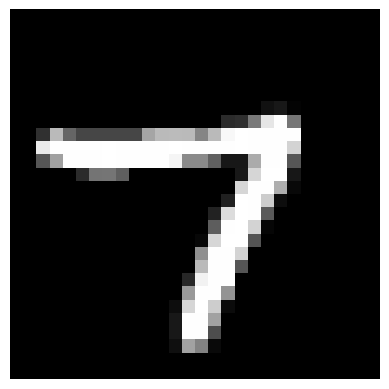

In [12]:
def show_mnist_sample(X, idx):
    image = X[:, idx].reshape((28, 28))

    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

show_mnist_sample(X, 4200)

In [13]:
C1 = 3
C2 = 4
matrix_filter = (Y==C1) | (Y==C2)
filtered_X = X[:, matrix_filter]
filtered_Y = Y[matrix_filter]

print(f"filtered_X: {filtered_X.shape}, filtered_Y: {filtered_Y.shape}")

filtered_X: (784, 8423), filtered_Y: (8423,)


In [14]:
num_samples = filtered_X.shape[1]
train_end = int(num_samples * 0.8)
print(train_end)

X_train = filtered_X[:, :train_end]
X_test = filtered_X[:, train_end:]

y_train = filtered_Y[:train_end]
y_test = filtered_Y[train_end:]

print(f"X train: {X_train.shape}, y train: {y_train.shape}")
print(f"X train: {X_test.shape}, y train: {y_test.shape}")

6738
X train: (784, 6738), y train: (6738,)
X train: (784, 1685), y train: (1685,)


In [15]:
def fit_classifier(C1, C2, X_train, y_train) :
    X1 = X_train[:, y_train == C1]
    X2 = X_train[:, y_train == C2]

    U1, _, _ = np.linalg.svd(X1, full_matrices=False)
    U2, _, _ = np.linalg.svd(X2, full_matrices=False)

    return U1, U2

U1, U2 = fit_classifier(C1, C2, X_train, y_train)

### Testing the classifier

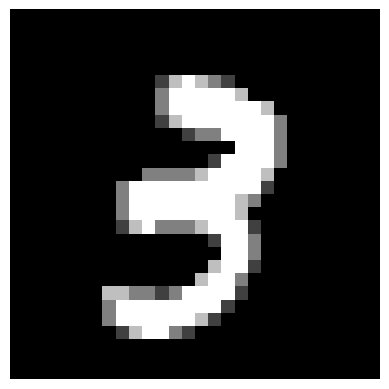

3


In [16]:
x = X_test[:, 20]
label = y_test[20]
show_mnist_sample(X_test, 20)
print(label)

In [17]:
def classify(x, U1, U2, C1, C2):
    x_p_1 = U1 @ (U1.T @ x)
    x_p_2 = U2 @ (U2.T @ x)

    d1 = np.linalg.norm((x_p_1 - x), 2)
    d2 = np.linalg.norm((x_p_2 - x), 2)

    y_pred = C1 if (d1 < d2) else C2
    return y_pred

print(f"classified as {classify(x, U1, U2, C1, C2)}")

classified as 3


In [18]:
def misclassification_rate(U1, U2, X_test, y_test, C1, C2):
    n_test = X_test.shape[1]
    count = 0
    for i in range(0, n_test):
        y_pred = classify(X_test[:, i], U1, U2, C1, C2)
        count += 1 if (y_pred != y_test[i]) else 0
    return (1/n_test)*count

misclassification_rate(U1, U2, X_test, y_test, C1, C2)

0.045103857566765576

### Using a classifier on more digits

In [19]:
def svd_classifier(C1, C2, X, Y):
    matrix_filter = (Y==C1) | (Y==C2)
    filtered_X = X[:, matrix_filter]
    filtered_Y = Y[matrix_filter]

    num_samples = filtered_X.shape[1]
    train_end = int(num_samples * 0.8)
    X_train = filtered_X[:, :train_end]
    X_test = filtered_X[:, train_end:]

    y_train = filtered_Y[:train_end]
    y_test = filtered_Y[train_end:]

    U1, U2 = fit_classifier(C1, C2, X_train, y_train)
    mr = misclassification_rate(U1, U2, X_test, y_test, C1, C2)
    return mr

In [20]:
pairs = [(1,7), (2,5), (6,9), (1,8), (4,7), (3,8), (1,3)]
mr_s = []
for i in pairs :
    mr = svd_classifier(i[0], i[1], X, Y)
    mr_s.append(mr)
    print(f"Misclassification error for {i} is {mr:.4f}")

mr_mean = sum(mr_s) / len(mr_s)
print(f"\nMean value of this set is {mr_mean}")


Misclassification error for (1, 7) is 0.0138
Misclassification error for (2, 5) is 0.1304
Misclassification error for (6, 9) is 0.1123
Misclassification error for (1, 8) is 0.1120
Misclassification error for (4, 7) is 0.0702
Misclassification error for (3, 8) is 0.1147
Misclassification error for (1, 3) is 0.0498

Mean value of this set is 0.08616682158725306


The misclassification error is higher for digits who are graphically similar, such as $6$ and $9$ and $8$ and $3$. In the case of the pair $1$ and $7$, while they may look similar, the presence of subtle details (e.g. the line in the center of $7$ and the base of $1$) may the classifier to distinguish more easily the two digits.

### 3-digit classifier

In [21]:
def classify_extended(x, U1, U2, U3, C1, C2, C3):
    x_p_1 = U1 @ (U1.T @ x)
    x_p_2 = U2 @ (U2.T @ x)
    x_p_3 = U3 @ (U3.T @ x)

    d1 = np.linalg.norm((x_p_1 - x), 2)
    d2 = np.linalg.norm((x_p_2 - x), 2)
    d3 = np.linalg.norm((x_p_3 - x), 2)

    distances = np.array([d1, d2, d3])
    class_labels = [C1, C2, C3]

    max_index = np.argmin(distances)
    return class_labels[max_index]

def misclassification_rate_extended(U1, U2, U3, X_test, y_test, C1, C2, C3):
    n_test = X_test.shape[1]
    count = 0
    for i in range(0, n_test):
        y_pred = classify_extended(X_test[:, i], U1, U2, U3, C1, C2, C3)
        count += 1 if (y_pred != y_test[i]) else 0
    return (1/n_test)*count

def fit_classifier_extended(C1, C2, C3, X_train, y_train) :
    X1 = X_train[:, y_train == C1]
    X2 = X_train[:, y_train == C2]
    X3 = X_train[:, y_train == C3]

    U1, _, _ = np.linalg.svd(X1, full_matrices=False)
    U2, _, _ = np.linalg.svd(X2, full_matrices=False)
    U3, _, _ = np.linalg.svd(X3, full_matrices=False)

    return U1, U2, U3

def svd_classifier_extended(C1, C2, C3, X, Y):
    matrix_filter = (Y==C1) | (Y==C2) | (Y==C3)
    filtered_X = X[:, matrix_filter]
    filtered_Y = Y[matrix_filter]

    num_samples = filtered_X.shape[1]
    train_end = int(num_samples * 0.8)
    X_train = filtered_X[:, :train_end]
    X_test = filtered_X[:, train_end:]

    y_train = filtered_Y[:train_end]
    y_test = filtered_Y[train_end:]

    U1, U2, U3 = fit_classifier_extended(C1, C2, C3, X_train, y_train)
    mr = misclassification_rate_extended(U1, U2, U3, X_test, y_test, C1, C2, C3)
    return mr

In [22]:
pairs = [(1,7,2), (2,5,9), (1,3,8), (3,6,9), (0,6,9)]

mr_s = []

for i in pairs :
    mr = svd_classifier_extended(i[0], i[1], i[2], X, Y)
    mr_s.append(mr)
    print(f"Misclassification error for {i} is {mr:.4f}")

mr_mean = sum(mr_s) / len(mr_s)
print(f"\nMean value of this set is {mr_mean}")


Misclassification error for (1, 7, 2) is 0.0388
Misclassification error for (2, 5, 9) is 0.0946
Misclassification error for (1, 3, 8) is 0.2302
Misclassification error for (3, 6, 9) is 0.1774
Misclassification error for (0, 6, 9) is 0.1212

Mean value of this set is 0.13243632179069065


When adding another label to predict, the misclassification error is generally higher in comparison to the two label experiment. In addition, the 3-digit array $1$, $3$, $8$, whose pairs had very high misclassification rate in the previous example, present an even higher value for $MR$. 

As such, adding another label to the classification process influences the accuracy and overall complexity of the task.